# Exploring COVID-19 pandemic in Spain

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

We are starting creating a dataframe from the CSV file provided by Datadista in their repository. To begin our EDA, let's see the first few rows of the dataset and the shape of the table.

In [2]:
file_data = 'https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_datos_isciii.csv'

df = pd.read_csv(file_data)

print(df.shape)  # df size
df.head()

(1140, 8)


Fecha  cod_ine       CCAA  Casos  Hospitalizados  UCI  Fallecidos  \
0  2020-02-20        1  Andalucía    NaN             NaN  NaN         NaN   
1  2020-02-20        2     Aragón    NaN             NaN  NaN         NaN   
2  2020-02-20        3   Asturias    NaN             NaN  NaN         NaN   
3  2020-02-20        4   Baleares    1.0             NaN  NaN         NaN   
4  2020-02-20        5   Canarias    1.0             NaN  NaN         NaN   

   Recuperados  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

With this first insight we can see the columns we have:
    
- **Fecha**: Date of the data log.
- **cod_ine**: A unique code for each community from the INE (Spanish Statistic Institute). 
- **CCAA**: The community itself (string).
- **Casos**: Total accumulated cases for a certain community in a certain date.
- **Hospitalizados**: People in hospital (we will make a point about this one later).
- **UCI**: People in ICU (also to be commented).
- **Fallecidos**: Deceased people data.
- **Recuperados**: Recovered people.

The point about 'Hospitalizados' and 'UCI' is that **some communities' value is referred to accumulated data but other refers to people in Hospital or ICU for this day** (Madrid, Castilla y León, Galicia, Comunidad Valenciana and Castilla La Mancha). So as we don't have consistency between communities we are dropping these columns.

We are also computing active cases, this is taking the cases and subtracting deceased and recovered.

In [3]:
df = df.drop(columns=['Hospitalizados', 'UCI'])
df['Casos Activos'] = df['Casos'] - df['Fallecidos'] - df['Recuperados']
df.head()

Fecha  cod_ine       CCAA  Casos  Fallecidos  Recuperados  \
0  2020-02-20        1  Andalucía    NaN         NaN          NaN   
1  2020-02-20        2     Aragón    NaN         NaN          NaN   
2  2020-02-20        3   Asturias    NaN         NaN          NaN   
3  2020-02-20        4   Baleares    1.0         NaN          NaN   
4  2020-02-20        5   Canarias    1.0         NaN          NaN   

   Casos Activos  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

Let's perform some first processing to avoid future error, warnings and problems.

In [4]:
# First, 'Fecha' column to datetime format
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.fillna(0)  # Second, fill al the NaN with zeros to avoid errors

In this point we would normally check column values, just for info; as we are reading the file directly from a repository that is daily updated the values will change per update. 

Following the analysis we would break it in two parts; first analyzing the whole Spanish data and second per community analysis. 

## Spain overall analysis

So let's group the data daily without community influence.

Also one important metric apart from the accumulated data can be **daily change and daily percentage change.** We will also compute this thanks to pandas. Just for fun we will also compute percentage each 5 days to try to catch trend changes.

In [5]:
df_spain = df.groupby('Fecha').sum()
df_spain = df_spain.drop(columns=['cod_ine'])  # We don't longer want cod_ine


cols = ['Casos', 'Fallecidos', 'Recuperados', 'Casos Activos']

for col in cols:
    df_spain['chg_{}'.format(col)] = df_spain[col].diff()
    df_spain['pct_chg_{}'.format(col)] = df_spain[col].pct_change()
    df_spain['5_pct_chg_{}'.format(col)] = df_spain[col].pct_change(periods=5)

df_spain.head()

Casos  Fallecidos  Recuperados  Casos Activos  chg_Casos  \
Fecha                                                                  
2020-02-20    2.0         0.0          0.0            0.0        NaN   
2020-02-21    2.0         0.0          0.0            0.0        0.0   
2020-02-22    2.0         0.0          0.0            0.0        0.0   
2020-02-23    2.0         0.0          0.0            0.0        0.0   
2020-02-24    3.0         0.0          0.0            0.0        1.0   

            pct_chg_Casos  5_pct_chg_Casos  chg_Fallecidos  \
Fecha                                                        
2020-02-20            NaN              NaN             NaN   
2020-02-21            0.0              NaN             0.0   
2020-02-22            0.0              NaN             0.0   
2020-02-23            0.0              NaN             0.0   
2020-02-24            0.5              NaN             0.0   

            pct_chg_Fallecidos  5_pct_chg_Fallecidos  chg_Recuperados  \
Fecha                                                                   
2020-02-20                 NaN                   NaN              NaN   
2020-02-21                 NaN                   NaN              0.0   
2020-02-22                 NaN                   NaN              0.0   
2020-02-23                 NaN                   NaN              0.0   
2020-02-24                 NaN                   NaN              0.0   

            pct_chg_Recuperados  5_pct_chg_Recuperados  chg_Casos Activos  \
Fecha                                                                       
2020-02-20                  NaN                    NaN                NaN   
2020-02-21                  NaN                    NaN                0.0   
2020-02-22                  NaN                    NaN                0.0   
2020-02-23                  NaN                    NaN                0.0   
2020-02-24                  NaN                    NaN                0.0   

            pct_chg_Casos Activos  5_pct_chg_Casos Activos  
Fecha                                                       
2020-02-20                    NaN                      NaN  
2020-02-21                    NaN                      NaN  
2020-02-22                    NaN                      NaN  
2020-02-23                    NaN                      NaN  
2020-02-24                    NaN                      NaN

In [6]:
df_spain.describe()

Casos    Fallecidos   Recuperados  Casos Activos    chg_Casos  \
count      60.000000     60.000000     60.000000       60.00000    59.000000   
mean    64089.500000   4897.450000  15512.816667    30818.05000  3393.355932   
std     71275.511605   5886.490662  21370.653573    30728.55957  2923.580214   
min         2.000000      0.000000      0.000000        0.00000     0.000000   
25%       380.500000      0.000000      0.000000        0.00000   133.000000   
50%     26749.000000   1366.500000   2182.000000    18747.00000  3431.000000   
75%    131827.250000   9909.500000  29001.250000    66686.50000  5617.000000   
max    200210.000000  16843.000000  66653.000000    75158.00000  9222.000000   

       pct_chg_Casos  5_pct_chg_Casos  chg_Fallecidos  pct_chg_Fallecidos  \
count      59.000000        55.000000       59.000000           43.000000   
mean        0.248013         3.118040      285.474576                 inf   
std         0.352529         4.455836      259.912078                 NaN   
min         0.000000         0.126171        0.000000            0.019552   
25%         0.035959         0.298343        0.000000            0.046601   
50%         0.146273         1.382883      323.000000            0.105417   
75%         0.317715         4.360225      511.000000            0.265443   
max         2.333333        20.666667      706.000000                 inf   

       5_pct_chg_Fallecidos  chg_Recuperados  pct_chg_Recuperados  \
count             43.000000        59.000000            43.000000   
mean                    inf      1129.711864                  inf   
std                     NaN      1231.849983                  NaN   
min                0.136275        -8.000000            -0.042328   
25%                0.299223         0.000000             0.050328   
50%                1.032214       486.000000             0.116010   
75%                3.490602      2345.500000             0.255404   
max                     inf      3331.000000                  inf   

       5_pct_chg_Recuperados  chg_Casos Activos  pct_chg_Casos Activos  \
count              43.000000          59.000000              43.000000   
mean                     inf        1271.830508                    inf   
std                      NaN        1432.872773                    NaN   
min                 0.229715        -174.000000              -0.002430   
25%                 0.503109           0.000000               0.013001   
50%                 1.417749         861.000000               0.069656   
75%                 2.505469        2242.000000               0.184987   
max                      inf        5199.000000                    inf   

       5_pct_chg_Casos Activos  
count                43.000000  
mean                       inf  
std                        NaN  
min                   0.016184  
25%                   0.068978  
50%                   0.645457  
75%                   1.546723  
max                        inf

Describing our dataframe gave us the clue that we have some infinite values (due to zero division in the calculation) and also some NaNs because of no increments. Let's fix it.

In [7]:
df_spain.fillna(0)
df_spain = df_spain.replace(np.inf, 0)
df_spain.describe()

Casos    Fallecidos   Recuperados  Casos Activos    chg_Casos  \
count      60.000000     60.000000     60.000000       60.00000    59.000000   
mean    64089.500000   4897.450000  15512.816667    30818.05000  3393.355932   
std     71275.511605   5886.490662  21370.653573    30728.55957  2923.580214   
min         2.000000      0.000000      0.000000        0.00000     0.000000   
25%       380.500000      0.000000      0.000000        0.00000   133.000000   
50%     26749.000000   1366.500000   2182.000000    18747.00000  3431.000000   
75%    131827.250000   9909.500000  29001.250000    66686.50000  5617.000000   
max    200210.000000  16843.000000  66653.000000    75158.00000  9222.000000   

       pct_chg_Casos  5_pct_chg_Casos  chg_Fallecidos  pct_chg_Fallecidos  \
count      59.000000        55.000000       59.000000           43.000000   
mean        0.248013         3.118040      285.474576            0.178659   
std         0.352529         4.455836      259.912078            0.223189   
min         0.000000         0.126171        0.000000            0.000000   
25%         0.035959         0.298343        0.000000            0.041094   
50%         0.146273         1.382883      323.000000            0.098988   
75%         0.317715         4.360225      511.000000            0.255151   
max         2.333333        20.666667      706.000000            1.164062   

       5_pct_chg_Fallecidos  chg_Recuperados  pct_chg_Recuperados  \
count             43.000000        59.000000            43.000000   
mean               1.387857      1129.711864             0.293092   
std                1.750807      1231.849983             0.776768   
min                0.000000        -8.000000            -0.042328   
25%                0.182775         0.000000             0.048008   
50%                0.557504       486.000000             0.101663   
75%                2.237390      2345.500000             0.238298   
max                7.393939      3331.000000             4.869565   

       5_pct_chg_Recuperados  chg_Casos Activos  pct_chg_Casos Activos  \
count              43.000000          59.000000              43.000000   
mean                1.669006        1271.830508               0.178795   
std                 3.260834        1432.872773               0.446709   
min                 0.000000        -174.000000              -0.002430   
25%                 0.301897           0.000000               0.012329   
50%                 1.014041         861.000000               0.068806   
75%                 1.829978        2242.000000               0.170154   
max                21.260870        5199.000000               2.898551   

       5_pct_chg_Casos Activos  
count                43.000000  
mean                  1.049143  
std                   2.532480  
min                   0.000000  
25%                   0.034486  
50%                   0.291935  
75%                   1.106195  
max                  16.010870

Okay, it seems better now (not perfect, we would change more things later). But we need to visualize a bit what we have in our data. Let's plot the **historical evolution in accumulated data.**

We could use Seaborn, Plotly, Plotly Express or another chart library but for easier and faster implementation we will use pandas' plotting implementation. (Plotly and Plotly Express was used to develop Dash online app).

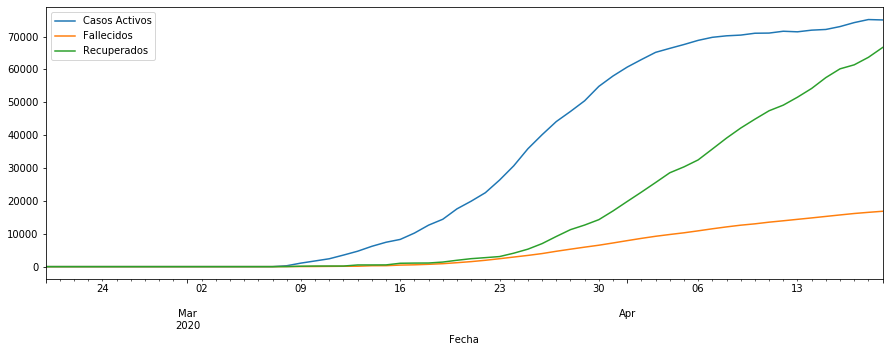

In [8]:
df_spain.plot(y=['Casos Activos', 'Fallecidos',
                 'Recuperados'], figsize=(15, 5))

We see that the cases seems to have started in a "exponential" way but then the curve started flattening and not so big deceased increment. But this information this way is not so useful, **let's compute daily increments and daily percentage increments.**

For 5 days percentage we will explore it later.

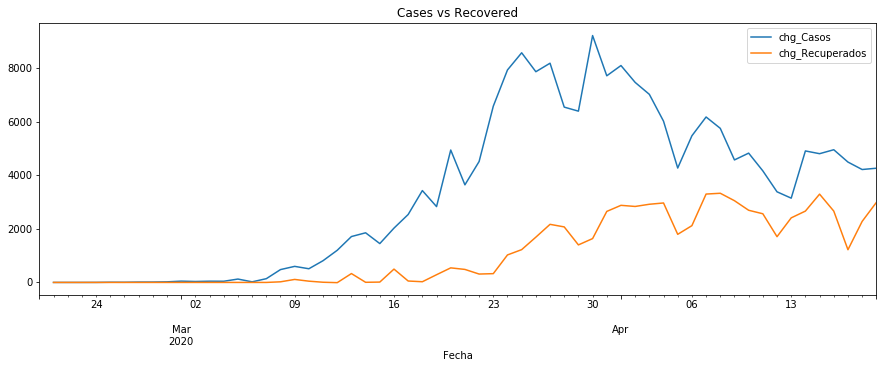

In [9]:
df_spain.plot(y=['chg_Casos', 'chg_Recuperados'], kind='line',
              figsize=(15, 5), title='Cases vs Recovered')

In this case we follow some logic; it seems that recovered line (yellow) follows the same pattern than cases (blue) as logical. Active cases need some time in hospital to recover so the the maximums of cases are delayed maximums in recovered. What about deceased?

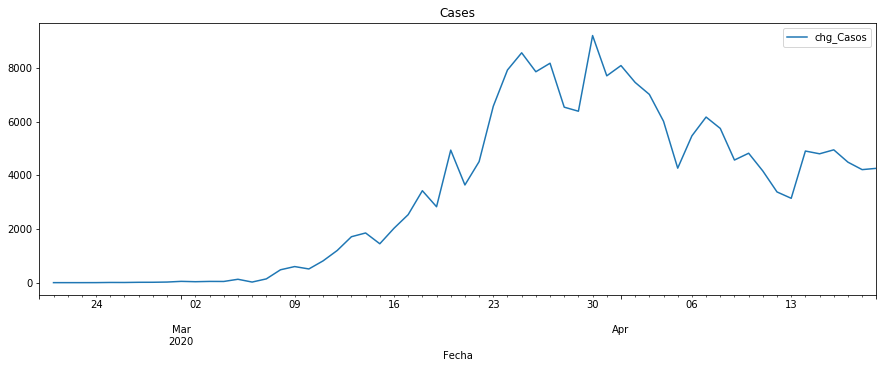

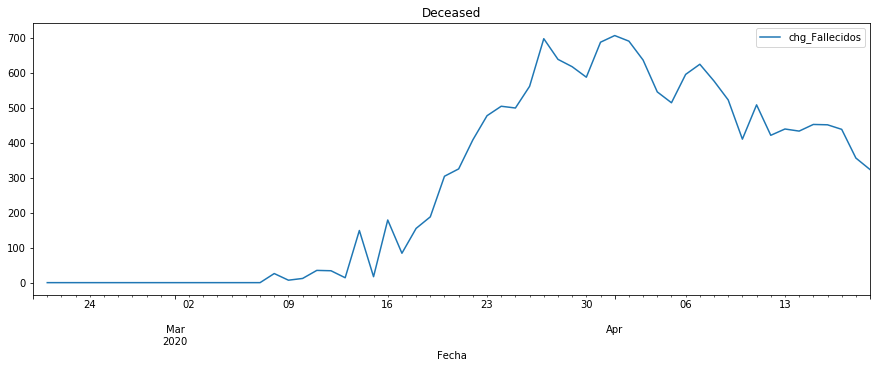

In [10]:
# The scales are so different so let's plot both individually
df_spain.plot(y='chg_Casos', kind='line', figsize=(15, 5), title='Cases')
df_spain.plot(y='chg_Fallecidos', kind='line',
              figsize=(15, 5), title='Deceased')

It seems the same. We have found two logical insights and also:

- Cases started decreasing about 30th March: maybe because of the strict lockdown started on 29th. Also the first lockdown started at 14th of March, taking into account that the illness can take 10-15 days to show effects maybe the start of the decreasing is also thanks to the first lockdown decreed.

We don't want to focus on "today" metrics because of the changing situation, so let's go deeper. **First let's take a look at the percentage changes.**


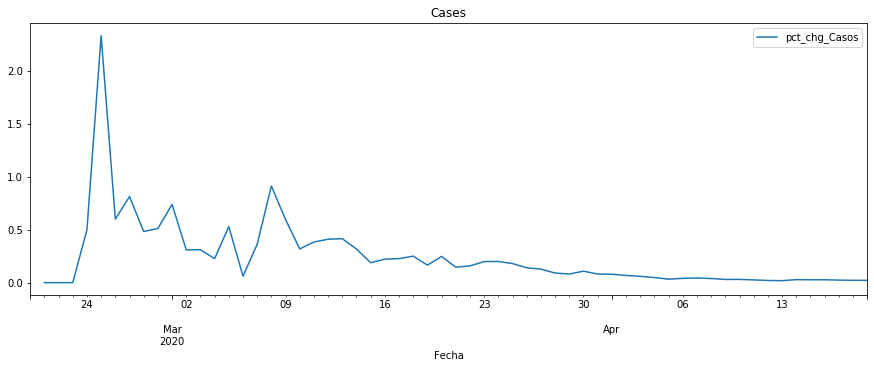

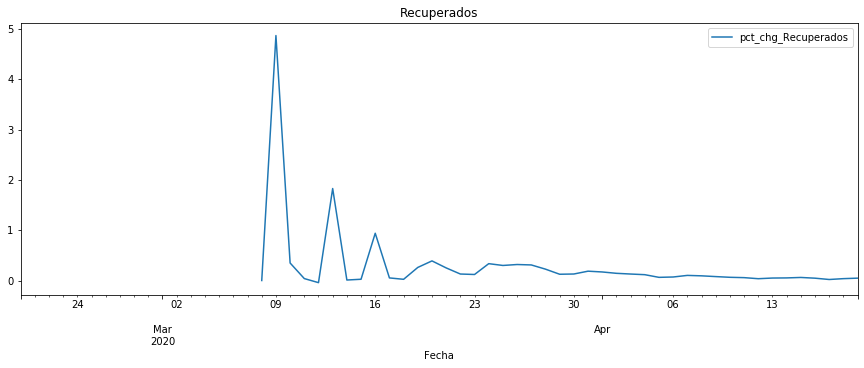

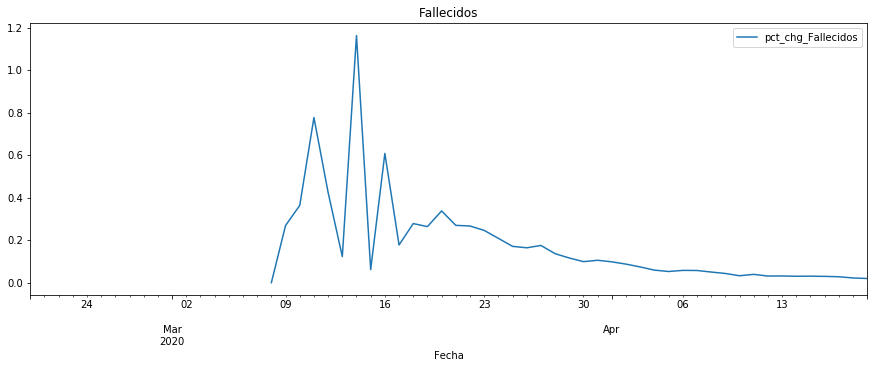

In [11]:
df_spain.plot(y='pct_chg_Casos', kind='line', figsize=(15, 5), title='Cases')
df_spain.plot(y='pct_chg_Recuperados', kind='line',
              figsize=(15, 5), title='Recuperados')
df_spain.plot(y='pct_chg_Fallecidos', kind='line',
              figsize=(15, 5), title='Fallecidos')

### Aquí falta plotear los porcentuales periódicos en 5 y 10 días

## Communities insights
At the beginning of this second part what we would like the most is to have a map to easily appreciate the status of the pandemic in every community. Remember that all of these metrics are available in a Dash app in this repository and deployed in [this web](http://www.coronadatos.info).

We will use Choropleth Mapbox in Plotly library; it can be done both with plotly express and with plotly graphing objects. We will use plotly express because it is easier and simple. First of all we need a GeoJSON with the shapes of every spanish community. Thanks to [Albert del Amor](https://albertdelamor.carto.com/tables/comunidades_autonomas_etrs89_30n/public/map) for the one we are using.

In [12]:
from urllib.request import urlopen
import json

with open('../geo.json') as response:
    communities = json.load(response)

# communities['features'][0] to inspect the formatting of the file

In [13]:
today_df = df[df['Fecha'] == df['Fecha'].max()]
today_df.head()

Fecha  cod_ine       CCAA    Casos  Fallecidos  Recuperados  \
1121 2020-04-19        1  Andalucía  11323.0      1013.0       3229.0   
1122 2020-04-19        2     Aragón   4886.0       637.0       1178.0   
1123 2020-04-19        3   Asturias   2348.0       200.0        599.0   
1124 2020-04-19        4   Baleares   1788.0       157.0       1005.0   
1125 2020-04-19        5   Canarias   2067.0       119.0        813.0   

      Casos Activos  
1121         7081.0  
1122         3071.0  
1123         1549.0  
1124          626.0  
1125         1135.0

In [14]:
import plotly.express as px

fig = px.choropleth_mapbox(today_df, geojson=communities, locations='cod_ine', # unique code for every community
                           featureidkey='properties.codigo', # geojson property that matches cod_ine 
                           hover_name='CCAA',
                           hover_data=['Casos Activos', 'Casos',
                                       'Fallecidos', 'Recuperados'],
                        color='Casos',
                           color_continuous_scale="OrRd",
                           mapbox_style='carto-positron',
                           opacity=0.7, width=0,
                           zoom=5, center={"lat": 40.416775, "lon": -3.703790},
                              animation_frame='Fecha', animation_group='cod_ine'
                          ) # center it in Madrid
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

#fig.show()

In [15]:
df_anim = df[df['Casos'] > 0]
df_anim = df_anim[(df_anim['cod_ine'] > 1) & (df_anim['cod_ine'] < 3)]
df_anim = df_anim.groupby(['Fecha','CCAA']).sum().reset_index()
df_anim['Fecha'] = df_anim['Fecha'].astype(str)
df_anim.head()

Fecha    CCAA  cod_ine  Casos  Fallecidos  Recuperados  Casos Activos
0  2020-03-04  Aragón        2    1.0         0.0          0.0            0.0
1  2020-03-05  Aragón        2    6.0         0.0          0.0            0.0
2  2020-03-06  Aragón        2   11.0         0.0          0.0            0.0
3  2020-03-07  Aragón        2   11.0         0.0          0.0            0.0
4  2020-03-08  Aragón        2   13.0         3.0          0.0            0.0